In [44]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import json
import ast
import math
from fnvhash import fnv1a_32

In [22]:
f=open('ast_result1.txt','r')
raw_data = json.loads(f.read())
f.close()
hashed_data=[]
index=[]
for i in range(1,21):
    hashed_element = []
    for j in range(len(raw_data[str(i)])):
        hashed_element.append((fnv1a_32(bytes(raw_data[str(i)][j][0], encoding="ascii"))+fnv1a_32(bytes(raw_data[str(i)][j][1], encoding="ascii")))/5000000000)
#    if len(hashed_element)==752:
    hashed_data.append(hashed_element)

for i in hashed_data:
    print(len(i))

min_length=min([len(i) for i in hashed_data])
hashed_data=[i[:min_length] for i in hashed_data]
print(len(hashed_data))
'''
max_length=max([len(i) for i in hashed_data])
tmp=[]
for i in hashed_data:
    if len(i)!=max_length:
        tmp.append(i+[0 for i in range(max_length-len(i))])
    else:
        tmp.append(i)
hashed_data=tmp
'''

442
414
442
402
432
354
431
379
366
370
366
371
393
363
367
344
369
372
362
498
20


'\nmax_length=max([len(i) for i in hashed_data])\ntmp=[]\nfor i in hashed_data:\n    if len(i)!=max_length:\n        tmp.append(i+[0 for i in range(max_length-len(i))])\n    else:\n        tmp.append(i)\nhashed_data=tmp\n'

In [67]:
f=open('character_list_output1.txt','r')
raw_data = ast.literal_eval(f.read())
f.close()
print(type(raw_data))
hashed_data=[]
index=[]
for i in range(1,21):
#    if len(hashed_element)==752:
    hashed_data.append([i/5 for i in raw_data[str(i)]])
    index.append(i)

min_length=min([len(i) for i in hashed_data])
hashed_data=[i[:min_length] for i in hashed_data]
print(len(hashed_data))

<class 'dict'>
20


/Users/fengjunyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


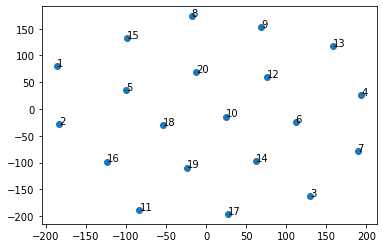

In [68]:
'''t-SNE'''
m = manifold.TSNE(learning_rate=50)
tsne_result = m.fit_transform(np.array(hashed_data))
plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1])
for i in range(len(tsne_result)):
    plt.text(tsne_result[i,0],tsne_result[i,1],i+1)



[[1, array([ 3.13126207, -0.01740423])], [2, array([2.20971096, 0.0062195 ])], [3, array([ 3.10894577, -0.07407901])], [4, array([ 1.97350508, -0.35644432])], [5, array([ 3.00822244, -0.08599484])], [6, array([-0.80069053,  1.18875229])], [7, array([0.34745883, 0.99557307])], [8, array([-0.61586687,  1.98637921])], [9, array([-0.97451412,  1.16343319])], [10, array([-1.18842595,  0.53430696])], [11, array([-1.32535694,  0.25429739])], [12, array([-0.80063761, -0.84262509])], [13, array([-1.12180107,  0.49536803])], [14, array([-0.8985638 , -1.66594957])], [15, array([-1.02072901, -1.63669712])], [16, array([-0.59705633, -0.32753449])], [17, array([-1.3215368 , -1.04702614])], [18, array([-0.41532905, -1.43618037])], [19, array([-1.61794268, -1.1938096 ])], [20, array([-1.08065443,  2.05941514])]]


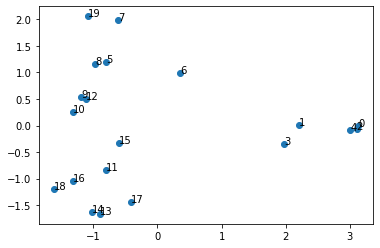

In [69]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hashed_data)
new_result=[]
for i in range(len(pca_result)):
    new_result.append([index[i],pca_result[i]])
print(new_result)
plt.scatter(x=pca_result[:,0],y=pca_result[:,1])
d=0
for i in range(len(pca_result)):
    plt.text(pca_result[i,0],pca_result[i,1],i)
    d+=1

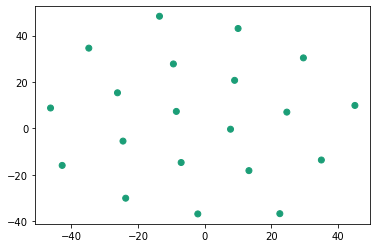

In [49]:
clusterer = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_pred = clusterer.fit_predict(tsne_result)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_pred, cmap='Dark2')

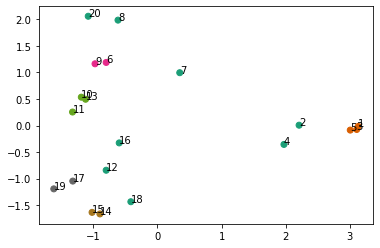

In [65]:
clusterer2 = DBSCAN(eps=0.4, min_samples=2, metric='euclidean')
z_pred = clusterer2.fit_predict(pca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=z_pred, cmap='Dark2')
d=0
for i in range(len(pca_result)):
    plt.text(pca_result[i,0],pca_result[i,1],i+1)
    d+=1